### Exercise-6 
### Python Program for Naive Bayes Classification.

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from itertools import product
import pandas as pd
import seaborn as sns

# Input: Dataset 
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create Gaussian Naive Bayes object
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = gnb.predict(X_test)

### Exercise-6 
### Output for Naive Bayes Classification.



ACCURACY OF GAUSSIAN NAIVE BAYES CLASSIFIER WITH ALL ATTRIBUTES

Predicted Class: 

1 0 2 2 2 2 1 1 0 1 1 0 0 0 2 1 0 1 0 1 0 1 1 2 1 1 0 0 2 2 0 1 0 2 1 0 0 1 2 0 2 1 2 1 0

Actual Class: 

1 0 2 2 2 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 2 1 2 1 1 0 0 2 2 0 1 0 2 1 0 0 1 2 0 2 1 2 1 0

Number of mislabeled points out of a total 45 points : 3

The Confusion Matrix for the Gaussian Naive Bayes Model



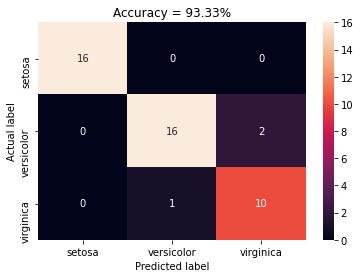


The Classification Report for the Gaussian Naive Bayes Model

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.89      0.91        18
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


_______________________________________________________________________



PLOTS OF GAUSSIAN NAIVE BAYES MODEL WITH ANY TWO ATTRIBUTES


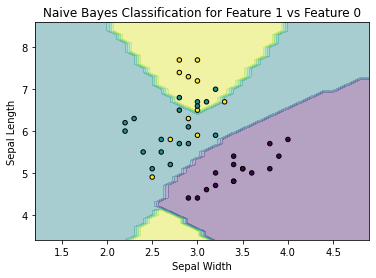

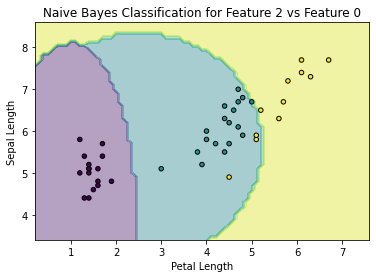

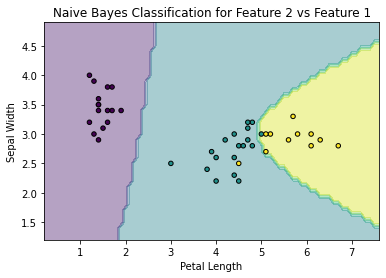

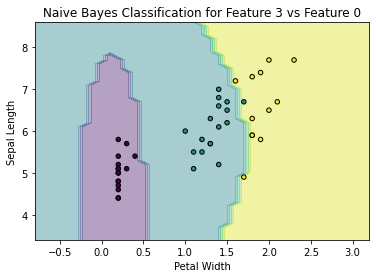

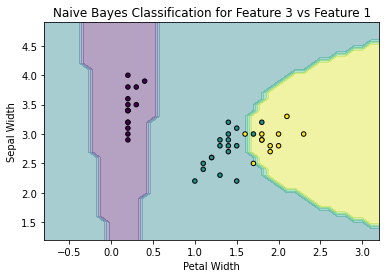

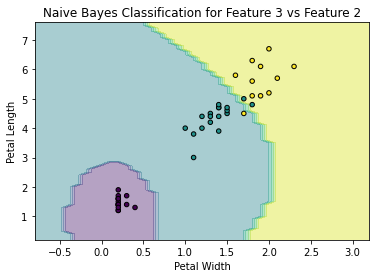

In [45]:
# Output: The Predicted vs Actual Class, Confusion Matrix and Classification Report
print("\n\nACCURACY OF GAUSSIAN NAIVE BAYES CLASSIFIER WITH ALL ATTRIBUTES")
print("\nPredicted Class: \n")
print(*y_pred, sep=' ')
print("\nActual Class: \n")
print(*y_test, sep=' ')
print("\nNumber of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
print("\nThe Confusion Matrix for the Gaussian Naive Bayes Model\n")
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy = {0:.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nThe Classification Report for the Gaussian Naive Bayes Model\n\n"
      ,metrics.classification_report(y_test, y_pred))
print("\n_______________________________________________________________________\n")
# Output: The Decision Boundary Plot for Pair of Attributes
Feature = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width' ]
print("\n\nPLOTS OF GAUSSIAN NAIVE BAYES MODEL WITH ANY TWO ATTRIBUTES")
for i in (0,1,2,3):
    for j in (0,1,2,3):
        if(j!=i):
            if(j<i):
                X = X_test[:, [i, j]]
                y = y_test
                gnb.fit(X,y)
                # Plotting decision regions
                x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
                y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
                xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                     np.arange(y_min, y_max, 0.1))
                Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(xx, yy, Z, alpha=0.4)
                plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
                plt.xlabel('{}'.format(Feature[i]))
                plt.ylabel('{}'.format(Feature[j]))
                plt.title('Naive Bayes Classification for Feature {} vs Feature {}'
                          .format(i,j)) 
                plt.show()

##### To implement the Naive Bayes Classification Algorithm, Gaussian Naive Bayes was used over Iris Dataset with Train-Test Split of 70:30. The model gives an accuracy of 93.33% and is a good fit to predict the classes for the given Dataset. 
##### The plot for the trained Gaussian Naive Bayes Model was plotted for taking any two attributes in consideration. It can be concluded from the plots that the results predicted by the model are satisfactory.